When we called pylab.plot previously, there were a few things happening in the background:

1. matplotlib created a Figure instance, which is an object describing the plot window and its properties, and containing lists of all its elements

2. matplotlib created an Axes element within the figure. An axes can be thought of as a plotting window, where data can be arranged by x and y coordinates.

We're going to repeat some of the previous examples now, except we will specify these Figure and Axes instances explicitly:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
print(type(plt))
print(type(plt.figure))


print(type(np))
print((type(np.array)))
print(type(pd))
print(type(pd.Series))
print(type(pd.DataFrame))


a =  pd.DataFrame(np.random.rand(4,4))
type(a)

<class 'module'>
<class 'function'>
<class 'module'>
<class 'builtin_function_or_method'>
<class 'module'>
<class 'type'>
<class 'type'>


pandas.core.frame.DataFrame

In [4]:
data = sns.load_dataset('tips')

print(data.shape)
data.head(2)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [21]:
x = np.linspace(0, 5, 11)
y = x ** 2

# -----------------------------------------------------------------------------------------

##### we cant create multiple plots here coz when we call plt.plot, 2 objects gets instantiated.
##### 1. figure object - just a canvas
##### 2. axes object - a frame, but here as a default only 1 frame has been instantiated so we cant have multiple frame to plot in and thus all plots go in 1 axes.

####  ----------------------------------------------------------------------------

###### x,y here are either a series object or an array, so in this case plt.plot() gives us only 1 axes object(only 1 plot)

###### if we were plotting, 2 dataframes instead, we would have got 2 plots. 
###### maybe becasue plt.plot() instantiated 2 axes objects in that case


#### No matter how many plots we make, we get only 1 plot - unlike the plotting in Pandas where we get all the plots


#### retrun type for plt.plot() and DF.plot() are different 
#### 1. No matter a 2d or 1d, all plots drawn using plt.plot() gets drawn in the same axes 
#### 2. for a DF.plot()  the plots gets drawn in multiple axes if we are drawing a DF,if drawing a series[DF.col.plot()] then in the same plot

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
139942372166176 139942372166176 139942372121064 139942372121064
[1, 2]


[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]

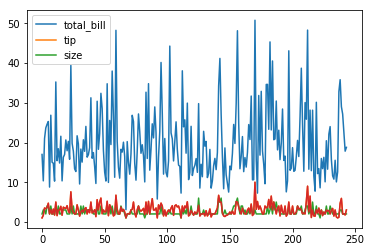

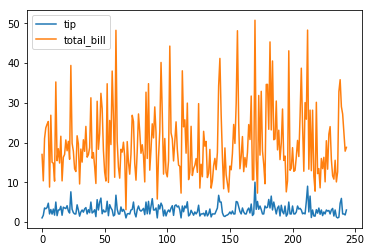

In [6]:
a = data.plot()
print(a)

b = data.tip.plot()
print(b)

c =  data[['tip','total_bill']].plot()
print(c)

# Here we can see id(a == b)  & similarly for c == d coz both these pairs are in the same axes
print(id(a),id(b),id(c),id(plt.gca()))

#_________________________________________________________
print(plt.get_fignums())

def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

- Unlike plotting via DF.plot(), Here we are getting lines2D objects unlike axes.subplot objects for DF.plot()

[<matplotlib.lines.Line2D object at 0x7f46d9082358>, <matplotlib.lines.Line2D object at 0x7f46d908b8d0>, <matplotlib.lines.Line2D object at 0x7f46d9016e10>]
<class 'tuple'>
139942298048264 139942276385384 139942265503584
[1]


Text(0,0.5,'Y Axis')

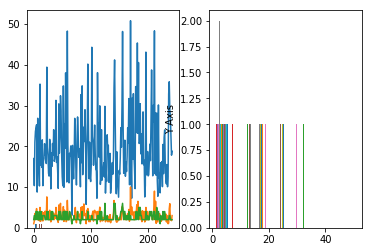

In [13]:
plt.subplot(121)
x1= plt.plot(data._get_numeric_data())
z1= plt.hist(data[['total_bill','size']]) 

plt.subplot(122)
y1= plt.hist(data[['total_bill','size']]) 


print(x1)
print(type(y1))
print(id(x1),id(y1),id(plt.gca()))
print(plt.get_fignums())

plt.ylabel('Y Axis')


#### subplots unpacks fig and axes objects , as can be seen here, we have 5 axes and 5 figures. also the axes are iterable

#### subplot is only for accessing a particular subplot. like - plt.subplot(1,5,3) - accessing the 3rd subplot of the 5 subplots made

[<matplotlib.lines.Line2D object at 0x7f46d3f39c50>] [<matplotlib.lines.Line2D object at 0x7f46d3ea8470>] [<matplotlib.lines.Line2D object at 0x7f46d3ad4da0>]
139942219518088 139942186064456 139942251639560 139942198723712 139942168631392


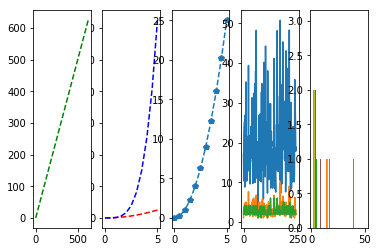

In [134]:
plt.subplot(1,5,2)
plt.plot(x, y, 'r--')
f1 = plt.plot(x, y**2, 'b--')


plt.subplot(1,5,1)
f2 = plt.plot(x**4, y**2, 'g--')


plt.subplot(1,5,3)
f3 = plt.plot(x, y, 'p--')

plt.subplot(1,5,4)
f4 = plt.plot(data._get_numeric_data())


plt.subplot(1,5,5)
f4 = plt.hist(data._get_numeric_data())

print(f1,f2,f3)

print(id(f1),id(f2),id(f3),id(f4),id(plt.gca()))

# plt.tight_layout()

#### As we can see, this creates a blank axes. Now we can call plot as we did before, except now we use the plot method of axes:

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

139942216289976 139942185560272 139942185560272
Axes(0.1,0.1;0.5x0.6)
[1]


[<Figure size 600x300 with 2 Axes>]

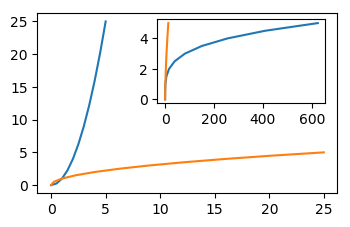

In [135]:
# here fig and axes are 2 objects associated with a 1 subplot 

# when we create a subplot these 2 operations get performed simultneously

# --------------------------------------------------------------------

# Create Figure (empty canvas)
fig = plt.figure(figsize=(6,3), dpi=100) # <Figure size 432x288 with 0 Axes>

axes = fig.add_axes([0.1,0.1,0.5,0.6]) # gives a figure as output
axes1 = fig.add_axes([0.3,0.4,0.28,0.28])

axes.plot(x,y)
axes.plot(y,x)

print(id(axes),id(axes1),id(plt.gca()))


axes1.plot(y**2,x)
axes1.plot(y**0.8,x)

print(axes)

#___________________________________________
print(plt.get_fignums())

def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

The same arguments can also be passed to layout managers, such as the `subplots` function:

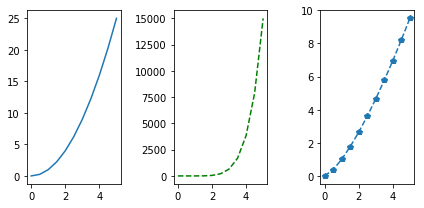

In [136]:
fig,axes =  plt.subplots(1,3,figsize=(6,3))

axes[0].plot(x,y)
axes[1].plot(x,y**3 - y**2 , 'g--')
axes[2].plot(x,y**0.7 , 'p--')

plt.tight_layout() 

#### setters for axes objects - axes[i].set_

- axes[0].set_position([0.1,0.1,0.5,0.6])
- axes[0].set_title("title");
- axes[0].set_xlabel("x")
- axes[0].set_ylabel("y");


[1]


[<Figure size 432x216 with 3 Axes>]

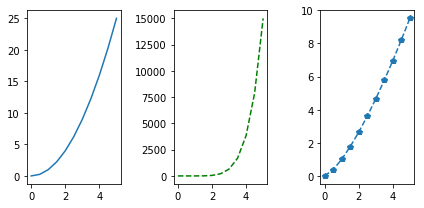

In [137]:
fig,axes =  plt.subplots(1,3,figsize=(6,3))


axes[0].plot(x,y)
axes[1].plot(x,y**3 - y**2 , 'g--')
axes[2].plot(x,y**0.7 , 'p--')

# ## setters for axes objects - axes[i].set_

# axes[0].set_position([0.1,0.1,0.5,0.6])
# axes[0].set_title("title");
# axes[0].set_xlabel("x")
# axes[0].set_ylabel("y");


plt.tight_layout() 

#____________________________________________
print(plt.get_fignums())

def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

## Legends, labels and titles

In [138]:
axes[0].set_title("title");
axes[0].set_xlabel("x")
axes[0].set_ylabel("y");

- Setting & Positioning the Label

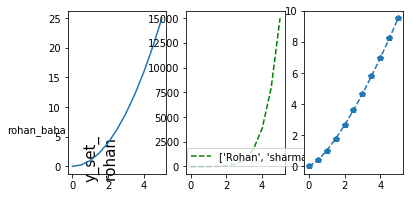

In [140]:
fig,axes =  plt.subplots(1,3,figsize=(6,3))


axes[0].plot(x,y)
axes[1].plot(x,y**3 - y**2 , 'g--',label = ['Rohan','sharma'])
axes[2].plot(x,y**0.7 , 'p--')
axes[0].set_ylabel('y_set_\nrohan',fontsize=15)

axes[0].yaxis.set_label_coords(0.5,0.1)
# plt.axis.yaxis.set_label_coords(0.5,0.1)


axes[0].text(-2,7, 'rohan_baba',
         rotation=0,horizontalalignment='center',verticalalignment='top',multialignment='center')

# Positioning the legend
# loc is for position - loc is for positioning the legends
axes[1].legend(loc= [.01,.05],ncol=1)

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

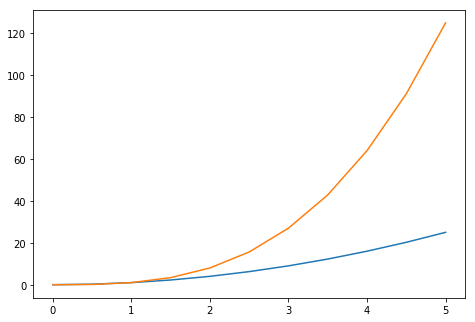

In [141]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

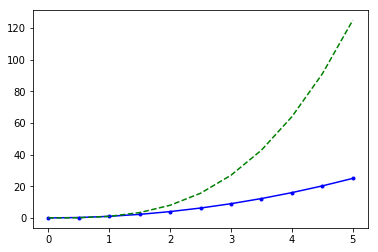

In [142]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

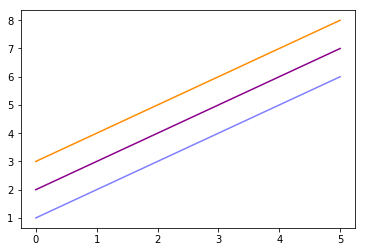

In [17]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

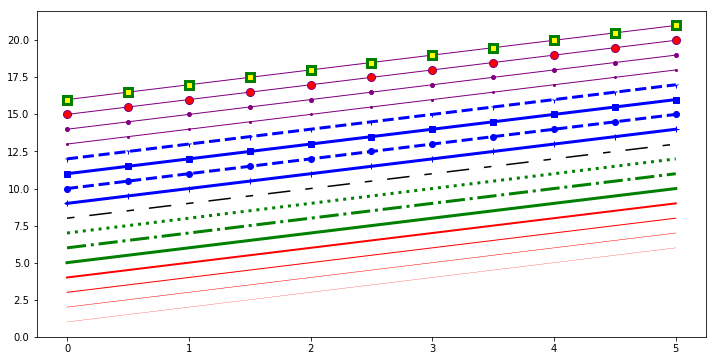

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

# ---------------------------- Plotting in Pandas -------------------------------------------

In [71]:
draw = pd.read_table('/home/rohan/Documents/ROHAN_DA/Refactored_Py_DS_ML_Bootcamp-master/07-Pandas-Built-in-Data-Viz/df1',sep=',',index_col= 0)
draw.head()
draw.shape

(1000, 4)

In [72]:
draw1=  pd.read_table('/home/rohan/Documents/ROHAN_DA/Refactored_Py_DS_ML_Bootcamp-master/07-Pandas-Built-in-Data-Viz/df2',sep=',')
draw1.head()
draw1.shape

(10, 4)

### >> when we have multiple plots in a cell, all genereal actions are acted on the last entry

140427300165784
140427300165784


[<Figure size 432x288 with 4 Axes>]

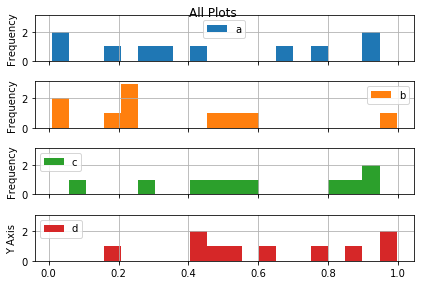

In [81]:
b = draw1.plot(kind = 'hist',bins = 20, subplots= True ,sharey= True,title= 'All Plots',grid = True)

a = plt.ylabel('Y Axis')

plt.tight_layout()

print(b)
# ----------------------------------------------------

print(id(b[3]))
print(id(plt.gca()))

def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

In [ ]:
draw1.head()

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


[<Figure size 720x216 with 1 Axes>]

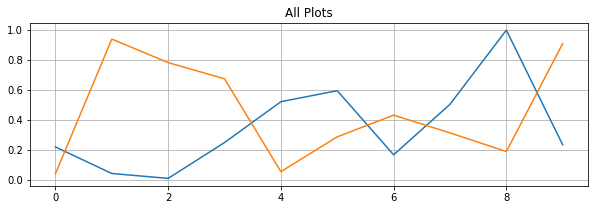

In [86]:
a = draw1.b.plot(kind = 'line', subplots= False ,sharey= True,title= 'All Plots',grid = True,figsize= (10,3))

b = draw1.a.plot(kind = 'line', subplots= False ,sharey= True,title= 'All Plots',grid = True,figsize= (10,3))


print(a,b)

def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

# --------------------------subplots() / subplots(1,2) for :- -----------------------


### 1. DF.COL.plot() - Pandas plotting



##### DF.col.plot(), when called(for series/arrays) does not  instantiates new figure objects and that's why the figures plotted uses the axes provided by the subplots()

[<Figure size 432x288 with 1 Axes>]

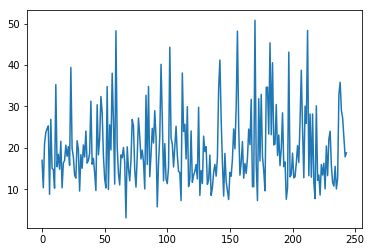

In [98]:
plt.subplots()

a = data.total_bill.plot()
#b = data._get_numeric_data().plot.area()

#_________________________________________________________
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()


### 2. DF.plot() - Pandas plotting

##### DF.plot(), when called(for dataframes) instantiates new figure objects and that's why the figures plotted does not uses the axes provided by the subplots()

[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

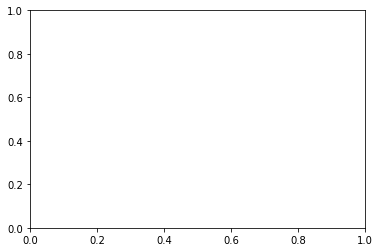

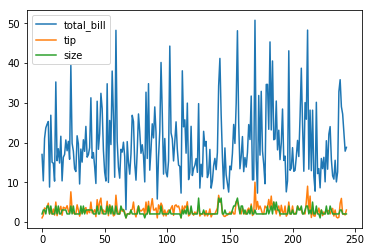

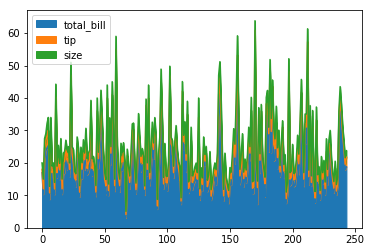

In [94]:
plt.subplots()

a = data.plot()
b = data._get_numeric_data().plot.area()

#_________________________________________________________
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

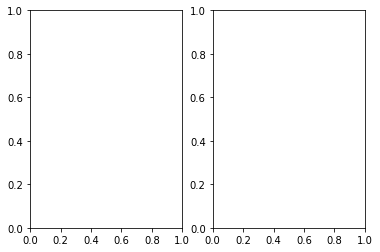

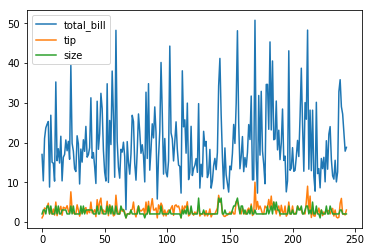

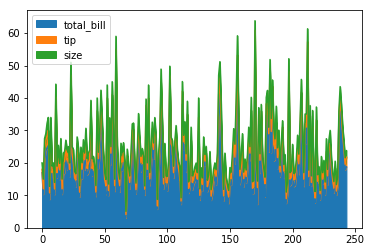

In [100]:
plt.subplots(1,2)

a = data.plot()
b = data._get_numeric_data().plot.area()

#_________________________________________________________
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

### 3. plt.plot() - Pytplot plotting



##### plt.plot(), when called(for Dataframes/series/arrays) does not  instantiates new figure objects and that's why the figures plotted uses the axes provided by the subplots()

140427278050416 140427278232392 140427453585736 140427282768088


[<Figure size 432x288 with 2 Axes>]

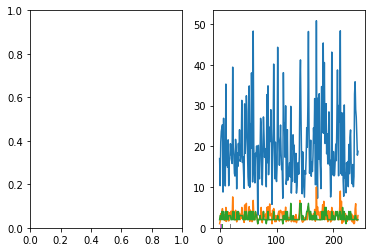

In [96]:
plt.subplots(1,2)

x1= plt.plot(data._get_numeric_data())
z1= plt.hist(data[['total_bill','size']]) 


print(id(plt.gca()),id(x1),id(y1),id(z1))
#_________________________________________________________
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

140427254701752 140427253815048 140427453585736 140427284259752


[<Figure size 432x288 with 1 Axes>]

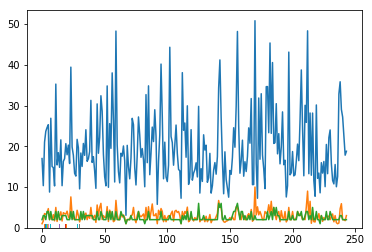

In [97]:
plt.subplots()

x1= plt.plot(data._get_numeric_data())
z1= plt.hist(data[['total_bill','size']]) 

#y1= plt.hist(data[['total_bill','size']]) 


print(id(plt.gca()),id(x1),id(y1),id(z1))
#_________________________________________________________
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

# Using subplots for seaborn and DF.plot() - pandas plots

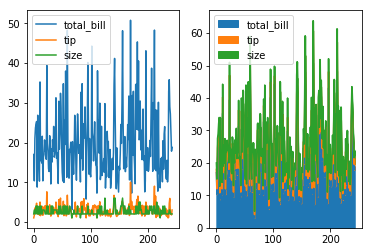

In [35]:
fig,ax = plt.subplots(1,2)


data.plot(ax= ax[0])
data._get_numeric_data().plot.area(ax = ax[1])


#### jointplots can not be easily created in a subplot axes. jointplot calls JointGrid method, which in turn creates a new figure object every time it is called. 

/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rohan/anaconda3/lib/python3.6/site

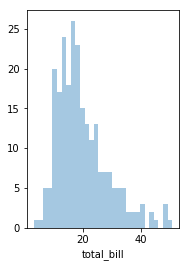

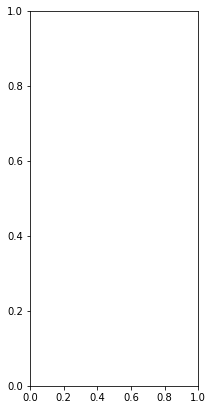

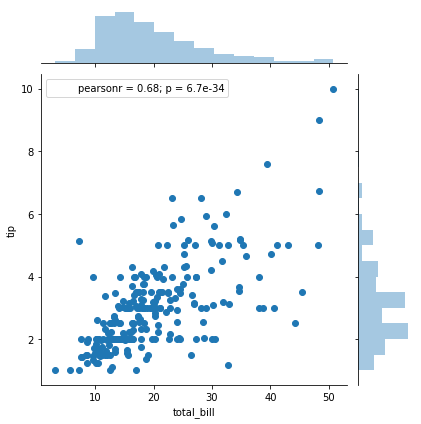

In [36]:
plt.subplot(121)
sns.distplot(data['total_bill'],kde=False,bins=30)
sns.jointplot(x='total_bill',y='tip',data=data,kind='hex')

plt.subplot(122)
sns.jointplot(x='total_bill',y='tip',data=data,kind='scatter')

## Update

### `Matplotlib API (OOP) vs Matlab API (Pyplot)`
### `Setter/Getter`

#### ` RC Params` 

####    LINES
####    See http://matplotlib.org/api/artist_api.html- module-matplotlib.lines for more
####    information on line properties.
- lines.linewidth   : 1.5     - -  line width in points
- lines.linestyle   : -       - -  solid line
- lines.color       : C0      - -  has no affect on plot(); see axes.prop_cycle
- lines.marker      : None    - -  the default marker
- lines.markerfacecolor  : auto    - -  the default markerfacecolor
- lines.markeredgecolor  : auto    - -  the default markeredgecolor
- lines.markeredgewidth  : 1.0     - -  the line width around the marker symbol
- lines.markersize  : 6            - -  markersize, in points
- lines.dash_joinstyle : round        - -  miter|round|bevel
- lines.dash_capstyle : butt          - -  butt|round|projecting
- lines.solid_joinstyle : round       - -  miter|round|bevel
- lines.solid_capstyle : projecting   - -  butt|round|projecting
- lines.antialiased : True         - -  render lines in antialiased (no jaggies)


####    AXES
- -  default face and edge color, default tick sizes,
- -  default fontsizes for ticklabels, and so on.  See
- -  http://matplotlib.org/api/axes_api.html- module-matplotlib.axes
- axes.facecolor      : white   - -  axes background color
- axes.edgecolor      : black   - -  axes edge color
- axes.linewidth      : 0.8     - -  edge linewidth
- axes.grid           : False   - -  display grid or not
- axes.grid.axis      : both    - -  which axis the grid should apply to
- axes.grid.which     : major   - -  gridlines at major, minor or both ticks
- axes.titlesize      : large   - -  fontsize of the axes title
- axes.titleweight    : normal  - -  font weight of title
- axes.titlepad       : 6.0     - -  pad between axes and title in points
- axes.labelsize      : medium  - -  fontsize of the x any y labels
- axes.labelpad       : 4.0     - -  space between label and axis
- axes.labelweight    : normal  - -  weight of the x and y labels
- axes.labelcolor     : black
- axes.axisbelow      : line    - -  draw axis gridlines and ticks below
                               - -  patches (True); above patches but below
                               - -  lines ('line'); or above all (False)
- axes.formatter.limits : -7, 7 - -  use scientific notation if log10
                               - -  of the axis range is smaller than the
                               - -  first or larger than the second
- axes.formatter.use_locale : False - -  When True, format tick labels
                                   - -  according to the user's locale.
                                   - -  For example, use ',' as a decimal
                                   - -  separator in the fr_FR locale.
- axes.formatter.use_mathtext : False - -  When True, use mathtext for scientific
                                     - -  notation.
- axes.formatter.min_exponent: 0 - -  minimum exponent to format in scientific notation
- axes.formatter.useoffset      : True    - -  If True, the tick label formatter
                                         - -  will default to labeling ticks relative
                                         - -  to an offset when the data range is
                                         - -  small compared to the minimum absolute
                                         - -  value of the data.
- axes.formatter.offset_threshold : 4     - -  When useoffset is True, the offset
                                         - -  will be used when it can remove
                                         - -  at least this number of significant
                                         - -  digits from tick labels.
- axes.spines.left   : True   - -  display axis spines
- axes.spines.bottom : True
- axes.spines.top    : True
- axes.spines.right  : True
- axes.unicode_minus  : True    - -  use unicode for the minus symbol
                               - -  rather than hyphen.  See
                               - -  http://en.wikipedia.org/wiki/Plus_and_minus_signs- Character_codes
- axes.prop_cycle    : cycler('color', ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf'])
                      - -  color cycle for plot lines  as list of string
                      - -  colorspecs: single letter, long name, or web-style hex
					  - -  Note the use of string escapes here ('1f77b4', instead of 1f77b4)
                      - -  as opposed to the rest of this file.
- axes.autolimit_mode : data - -  How to scale axes limits to the data.
                            - -  Use "data" to use data limits, plus some margin
                            - -  Use "round_number" move to the nearest "round" number
- axes.xmargin        : .05  - -  x margin.  See `axes.Axes.margins`
- axes.ymargin        : .05  - -  y margin See `axes.Axes.margins`
- polaraxes.grid      : True    - -  display grid on polar axes
- axes3d.grid         : True    - -  display grid on 3d axes


---------------------------

####    TICKS
- -  see http://matplotlib.org/api/axis_api.html- matplotlib.axis.Tick
- xtick.top            : False  - -  draw ticks on the top side
- xtick.bottom         : True   - -  draw ticks on the bottom side
- xtick.labeltop       : False  - -  draw label on the top
- xtick.labelbottom    : True   - -  draw label on the bottom
- xtick.major.size     : 3.5    - -  major tick size in points
- xtick.minor.size     : 2      - -  minor tick size in points
- xtick.major.width    : 0.8    - -  major tick width in points
- xtick.minor.width    : 0.6    - -  minor tick width in points
- xtick.major.pad      : 3.5    - -  distance to major tick label in points
- xtick.minor.pad      : 3.4    - -  distance to the minor tick label in points
- xtick.color          : black  - -  color of the tick labels
- xtick.labelsize      : medium - -  fontsize of the tick labels
- xtick.direction      : out    - -  direction: in, out, or inout
- xtick.minor.visible  : False  - -  visibility of minor ticks on x-axis
- xtick.major.top      : True   - -  draw x axis top major ticks
- xtick.major.bottom   : True   - -  draw x axis bottom major ticks
- xtick.minor.top      : True   - -  draw x axis top minor ticks
- xtick.minor.bottom   : True   - -  draw x axis bottom minor ticks
- xtick.alignment      : center - -  alignment of xticks

- ytick.left           : True   - -  draw ticks on the left side
- ytick.right          : False  - -  draw ticks on the right side
- ytick.labelleft      : True   - -  draw tick labels on the left side
- ytick.labelright     : False  - -  draw tick labels on the right side
- ytick.major.size     : 3.5    - -  major tick size in points
- ytick.minor.size     : 2      - -  minor tick size in points
- ytick.major.width    : 0.8    - -  major tick width in points
- ytick.minor.width    : 0.6    - -  minor tick width in points
- ytick.major.pad      : 3.5    - -  distance to major tick label in points
- ytick.minor.pad      : 3.4    - -  distance to the minor tick label in points
- ytick.color          : black  - -  color of the tick labels
- ytick.labelsize      : medium - -  fontsize of the tick labels
- ytick.direction      : out    - -  direction: in, out, or inout
- ytick.minor.visible  : False  - -  visibility of minor ticks on y-axis
- ytick.major.left     : True   - -  draw y axis left major ticks
- ytick.major.right    : True   - -  draw y axis right major ticks
- ytick.minor.left     : True   - -  draw y axis left minor ticks
- ytick.minor.right    : True   - -  draw y axis right minor ticks
- ytick.alignment      : center_baseline - -  alignment of yticks

####    GRIDS
- grid.color       :   b0b0b0    - -  grid color
- grid.linestyle   :   -         - -  solid
- grid.linewidth   :   0.8       - -  in points
- grid.alpha       :   1.0       - -  transparency, between 0.0 and 1.0

####    Legend
- legend.loc           : best
- legend.frameon       : True     - -  if True, draw the legend on a background patch
- legend.framealpha    : 0.8      - -  legend patch transparency
- legend.facecolor     : inherit  - -  inherit from axes.facecolor; or color spec
- legend.edgecolor     : 0.8      - -  background patch boundary color
- legend.fancybox      : True     - -  if True, use a rounded box for the
                                 - -  legend background, else a rectangle
- legend.shadow        : False    - -  if True, give background a shadow effect
- legend.numpoints     : 1        - -  the number of marker points in the legend line
- legend.scatterpoints : 1        - -  number of scatter points
- legend.markerscale   : 1.0      - -  the relative size of legend markers vs. original
- legend.fontsize      : medium
- legend.title_fontsize    : None - -  None sets to the same as the default axes.  
- -  Dimensions as fraction of fontsize:
- legend.borderpad     : 0.4      - -  border whitespace
- legend.labelspacing  : 0.5      - -  the vertical space between the legend entries
- legend.handlelength  : 2.0      - -  the length of the legend lines
- legend.handleheight  : 0.7      - -  the height of the legend handle
- legend.handletextpad : 0.8      - -  the space between the legend line and legend text
- legend.borderaxespad : 0.5      - -  the border between the axes and legend edge
- legend.columnspacing : 2.0      - -  column separation

####    FIGURE
- -  See http://matplotlib.org/api/figure_api.html- matplotlib.figure.Figure
- figure.titlesize : large      - -  size of the figure title (Figure.suptitle())
- figure.titleweight : normal   - -  weight of the figure title
- figure.figsize   : 6.4, 4.8   - -  figure size in inches
- figure.dpi       : 100        - -  figure dots per inch
- figure.facecolor : white      - -  figure facecolor
- figure.edgecolor : white      - -  figure edgecolor
- figure.frameon : True         - -  enable figure frame
- figure.max_open_warning : 20  - -  The maximum number of figures to open through
                               - -  the pyplot interface before emitting a warning.
                               - -  If less than one this feature is disabled.
- -  The figure subplot parameters.  All dimensions are a fraction of the
- figure.subplot.left    : 0.125  - -  the left side of the subplots of the figure
- figure.subplot.right   : 0.9    - -  the right side of the subplots of the figure
- figure.subplot.bottom  : 0.11   - -  the bottom of the subplots of the figure
- figure.subplot.top     : 0.88   - -  the top of the subplots of the figure
- figure.subplot.wspace  : 0.2    - -  the amount of width reserved for space between subplots,
                                 - -  expressed as a fraction of the average axis width
- figure.subplot.hspace  : 0.2    - -  the amount of height reserved for space between subplots,
                                 - -  expressed as a fraction of the average axis height


### Tutorials

`RC_Params config`
- https://matplotlib.org/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py


`pyplot_tutorial`
- text()

`lifecylce`
- get_xticklabels()
- plt.setp() - to set the properties of multiple attr at once , to be used with getters

- getters are also used for bringging the objects in memory and then calling general method such as plt.setp() which will auto work on tnat object thats present in the memory

`Tight Layout guide`
- plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
- https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py

`Customizing Figure Layouts Using GridSpec and Other Functions` : **`IMP`**
- allows customized subplots with different & unequal dimensions

`Legend Guide`
- https://matplotlib.org/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py

`Text`
- ax.text(left, bottom, 'left top',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
- https://matplotlib.org/tutorials/text/text_props.html#sphx-glr-tutorials-text-text-props-py

- ax.text(0.95, 0.01, 'colored text in axes coords',verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes,color='green', fontsize=15)
- https://matplotlib.org/tutorials/text/text_intro.html#sphx-glr-tutorials-text-text-intro-py

`Annotations`
- How to put arrows,marker text etc
- https://matplotlib.rg/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Examples/Gallery

**Imp. headings : Subplots, axes and figures|| Text, labels and annotations || pyplot**

`Aligning Labels`
- fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

`Axes Demo`
- https://matplotlib.org/gallery/subplots_axes_and_figures/axes_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axes-demo-py
- basic axes synatxes

`Axes Props`
- https://matplotlib.org/gallery/subplots_axes_and_figures/axes_props.html#sphx-glr-gallery-subplots-axes-and-figures-axes-props-py
- tick_Params()

`Figure Title`
- fig.suptitle('This is a somewhat long figure title', fontsize=16)
- https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html#sphx-glr-gallery-subplots-axes-and-figures-figure-title-py

`Subplots Adjust`
- subplot_adjust() to adjust size of subplots, can also be done by axes.set_position()
- https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py

`Precise text layout`
- Talks about text()
- https://matplotlib.org/gallery/text_labels_and_annotations/text_alignment.html#sphx-glr-gallery-text-labels-and-annotations-text-alignment-py

`Controlling style of text and labels using a dictionary`
- https://matplotlib.org/gallery/text_labels_and_annotations/text_fontdict.html#sphx-glr-gallery-text-labels-and-annotations-text-fontdict-py
- font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
- plt.plot(x, y, 'k')
    - plt.title('Damped exponential decay', fontdict=font)
    - plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
    - plt.xlabel('time (s)', fontdict=font)
    - plt.ylabel('voltage (mV)', fontdict=font)

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [145]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [146]:
data = iris._get_numeric_data()
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


#### Major plotting classes(objects)

- `xaxis,yaxis(axes)`
- `labels`
- `legends`
- `text`
- `tick`
- `spine`
- `xlim/abound`

#### PYPLOT -  MATLAB API

[139942179255072]


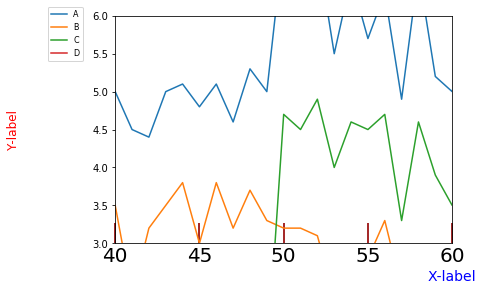

In [147]:
plt.plot(data)

print([id(plt.figure(i)) for i in plt.get_fignums()])

id(plt.gca())

# changing position of subplot object - without using axes object
plt.subplots_adjust(left=0.02, bottom=0.01, right=0.8, top=0.8)

# Labels - mapping,size,color,location
plt.xlabel('X-label',fontsize = 14,color = 'Blue',position = [1,2])

# labelpad allows movement in perpendicular diretion to axis and position in parallel direction to axis
plt.ylabel('Y-label',fontsize = 12,color = 'Red',position = [2,0.5],labelpad = 72)

# Ticks 

# only for xaxis, axis = 'both' applies for both axis
plt.tick_params(axis = 'x',direction='in',length=20, width=2,color ='brown',grid_color = 'red',
                labelsize = 20)


# Spine - No spine method defined for plt method

# X_Lim,Y_Lim 
plt.xlim(40,60)
plt.ylim(3,6)
    
# Legends -  location,mapping,size
plt.legend(['A','B','C','D'],fontsize = 8,loc = [-0.2,0.8])

#### MATPLOTLIB OBJECT ORIENTED APPROACH - API

**Position - axes.set_Position ~ set_aspect()**

- pos : [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
    The new position of the in `.Figure` coordinates.

- which : ['both' | 'active' | 'original'], optional
    Determines which position variables to change.

#### Labels - set_label()

- text ;'X-label',
- fontsize = 22,
- color = 'Red',
- position = [1,0.5],
- labelpad = 42)


`Text props applicable for fontdict(applicable everywhere)`
- fontproperties 	font_manager.FontProperties
- fontsize 	{size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
- rotation 	{angle in degrees, 'vertical', 'horizontal'}
- linespacing 	float (multiple of font size)
- multialignment 	{'left', 'right', 'center'}
- fontname 	{FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
- fontstretch 	{a numeric   value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
- fontstyle 	{'normal', 'italic', 'oblique'}
- fontvariant 	{'normal', 'small-caps'}
- fontweight 	{a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}

**Legend - axes.legend()**

- bbox_to_anchor : `.BboxBase` or pair of floats
    Specify any arbitrary location for the legend in `bbox_transform`
    coordinates (default Axes coordinates).

    For example, to put the legend's upper right hand corner in the
    center of the axes the following keywords can be used::

       loc='upper right', bbox_to_anchor=(0.5, 0.5)


- ncol : integer
    The number of columns that the legend has. Default is 1.

- fontsize

- frameon: whether to have a frame or not

- facecolor

- edgecolor

- mode: "expand"
legend expands to fill horizontal area

- title:
legends title

- labelspacing:
vertical spacing bw the elemnets in legends

 

#### tick_params - axes.tick_params()

- axis : {'x', 'y', 'both'}
    Axis on which to operate; default is 'both'.

- which : {'major', 'minor', 'both'}
    Default is 'major'; apply arguments to *which* ticks.

- direction : {'in', 'out', 'inout'}
 

- length : float
    Tick length in points.

- width : float
    Tick width in points.

- color : color
    Tick color; accepts any mpl color spec.

- pad : float
    Distance in points between tick and label.

- labelsize : float or str
    Tick label font size in points or as a string (e.g., 'large').

- labelcolor : color
    Tick label color; mpl color spec.

- colors : color
    Changes the tick color and the label color to the same value:
    mpl color spec.

- zorder : float
    Tick and label zorder.

- bottom, top, left, right : bool
    Whether to draw the respective ticks.

- labelbottom, labeltop, labelleft, labelright : bool
    Whether to draw the respective tick labels.

- labelrotation : float
    Tick label rotation

- grid_color : color
    Changes the gridline color to the given mpl color spec.

- grid_alpha : float
    Transparency of gridlines: 0 (transparent) to 1 (opaque).

- grid_linewidth : float
    Width of gridlines in points.

- grid_linestyle : string
    Any valid :class:`~matplotlib.lines.Line2D` line style spec.


**set_xlim() ~ axes.set_xbound()** 

- left : scalar, optional
    The left xlim (default: None, which leaves the left limit
    unchanged).

- right : scalar, optional
    The right xlim (default: None, which leaves the right limit
    unchanged).

**axes.text()**

- x, y : scalars
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

- s : str
    The text.

- fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

Text(45,5,'text')

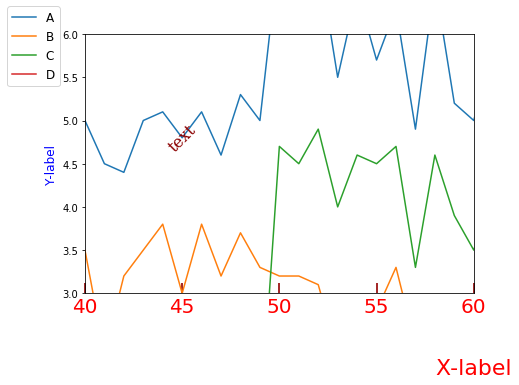

In [149]:
fig,axes = plt.subplots()

axes.plot(data)

# Moving the axes object after initializing
axes.set_position([0.1,0.1,0.9,.9],which ='both')

# setting x,y labels- setting is basically overwritting the defaults that are set
axes.set_xlabel('X-label',fontsize = 22,color = 'Red',position = [1,0.5],labelpad = 42)
axes.set_ylabel('Y-label',fontsize = 12,color = 'blue',position = [2,0.5])

# Legend - location,mapping,size
axes.legend(['A','B','C','D'],fontsize = 12,loc = [-0.2,0.8])

# X_Lim,Y_Lim 
axes.set_xlim(40,60)
axes.set_ylim(3,6)

# Ticks -------------------------------------------

# changes for both the axis
# axes.tick_params(direction='in',length=10, width=2,color ='brown',grid_color = 'red',labelsize = 20)

# only  for x axis
axes.tick_params(axis= 'x',direction='in',length=10, width=2,color ='brown',
                 labelcolor = 'red',grid_color = 'red',labelsize = 20)
#alternatively,
# axes.xaxis.set_tick_params(direction='in',length=10, width=2,color ='brown',grid_color = 'red',labelsize = 20)

# ---------------------------------------------------

# bound - this is very much the x_lim/y_lim
#axes.set_xbound()

# aspect
#axes.set_aspect() - This is used for positioning which is similar to set_position

# -------------------------------------------------------

# set_text

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16 }

axes.text(45,5,'text',fontdict=font,rotation=45,horizontalalignment='center',
          verticalalignment='top',multialignment='center')

#Spine
# axes.spines(['bottom']).set_position('data',0)


# visible
# axes.legend().set_visible(False)

### Getters || Setters

x
bottom
Text(0.5,0,'x_label')
x_label
Figure(432x288)
x_label
<a list of 10 Text major ticklabel objects>
10.0
-------------
box
(1.0, 1.0, 1.0, 1)
Figure(432x288)
Legend
Legend
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)
XAxis(54.000000,36.000000)
(-7.45, 156.45)
x_label
(-7.45, 156.45)
<a list of 10 Text xticklabel objects>
<a list of 0 Text xticklabel objects>
<a list of 10 Text xticklabel objects>
<a list of 20 Line2D xtickline objects>
<bound method _AxesBase.get_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x7f46d3ca5710>>


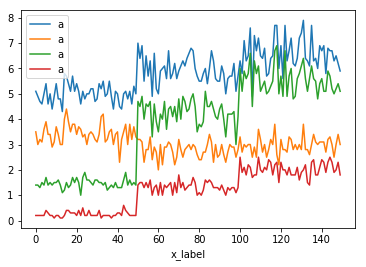

In [150]:
fig,axes = plt.subplots()

axes.plot(data,label = 'a')
axes.set_xlabel('x_label')
axes.legend(['A','B','C','D'],fontsize = 12,loc = [-0.2,0.8])
# axes.setters ------------------------------



print(axes.xaxis.axis_name)
# axes.xaxis.figure
#print(axes.get_axes_locator())
print(axes.xaxis.get_label_position()) # getter - "bottom"
print(axes.xaxis.get_label())
print(axes.xaxis.get_label_text()) #  text in the label;
print(axes.xaxis.get_figure())
print(axes.xaxis.get_label_text())
print(axes.xaxis.get_majorticklabels())
print(axes.xaxis.label.get_fontsize())

# General purpose getters
print('-------------')
print(axes.get_adjustable()) # box
print(axes.get_facecolor())  # dont know - [1,1,1,1]
print(axes.get_figure()) # fgure object - 432*288
# print(axes.get_label())
print(axes.legend()) # Legend
print(axes.legend_) # Legend
print(axes.get_position()) # position [x,y,x,y]
print(axes.get_xaxis()) # ?
print(axes.get_xbound()) # boundation of x_axis
print(axes.get_xlabel()) # 'x_label'
print(axes.get_xlim()) # x-Limit

# tick_objects
print(axes.get_xmajorticklabels())
print(axes.get_xminorticklabels())
print(axes.get_xticklabels())
print(axes.get_xticklines())
print(axes.get_xticks)

# print(axes.get_label_position())
# print(axes.get_label_text())